## Zadanie 6
W tym zadaniu mieliśmy za zadanie rozwiązać problem początkowy z równaniem różniczkowym zwyczajnym:
$$
y' = \alpha t^{\alpha-1}
$$
z warunkiem początkowym $$y(0) = 0$$ Rozwiązaniem analitycznym tego problemu jest funkcja $$y(t) = t^\alpha$$ Naszym celem było zastosowanie metody Eulera do numerycznego rozwiązania tego problemu dla trzech różnych wartości parametru $\alpha$: $2.5$, $1.5$ oraz $1.1$. Dla każdej wartości $\alpha$, przeprowadziliśmy obliczenia z użyciem trzech różnych rozmiarów kroku $h$: $0.2$, $0.1$ oraz $0.05$. Po przeprowadzeniu symulacji, obliczyliśmy błąd numeryczny w węzłach rozwiązania, a następnie wyznaczyliśmy empiryczny rząd zbieżności metody Eulera.

In [78]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
def get_err_and_order_of_convergence(alpha, h, t_max):
    dy = lambda t: alpha * np.pow(t, alpha - 1)
    y0 = 0
    y_exact = lambda t: np.pow(t, alpha)
    
    steps = int(t_max / h)
    t_vec = np.linspace(0, t_max, steps + 1)
    y_vec = np.zeros(steps + 1)
    y_vec[0] = y0
    for i in range(steps):
        y_vec[i + 1] = y_vec[i] + h * dy(t_vec[i])
    y_exact_vec = y_exact(t_vec)
    error_vec = np.abs(y_vec - y_exact_vec)
    r_vec = np.zeros(error_vec.size - 2)
    for i in range(1, steps):
        if error_vec[i - 1] == 0 or error_vec[i] == 0 or error_vec[i + 1] == 0:
            r_vec[i - 1] = np.nan
            continue
        denom = np.log(error_vec[i - 1] / error_vec[i])
        if denom == 0:
            r_vec[i - 1] = np.nan
            continue
        r_vec[i - 1] = np.log(error_vec[i] / error_vec[i + 1]) / denom
    return t_vec, error_vec, r_vec

In [80]:
alpha_vec = [2.5, 1.5, 1.1]
h_vec = [0.2, 0.1, 0.05]
t_max = 5

In [81]:
def plot(alpha_index, result_index, title, ylabel, labels):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    for i in range(3):
        plt.plot(np.resize(results[alpha_index][i][0], results[alpha_index][i][result_index].size), results[alpha_index][i][result_index], label=labels[i])
    plt.xlabel('t')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [82]:
results = [[get_err_and_order_of_convergence(alpha, h, t_max) for h in h_vec]
           for alpha in alpha_vec]

In [83]:
labels = [f"h = {h}" for h in h_vec]

error_titles = [f"Błąd numeryczny dla α={alpha}" for alpha in alpha_vec]
error_ylabel = 'Błąd numeryczny'

r_titles = [f"Empiryczny rząd zbieżności dla α={alpha}" for alpha in alpha_vec]
r_ylabel = 'Empiryczny rząd zbieżności'

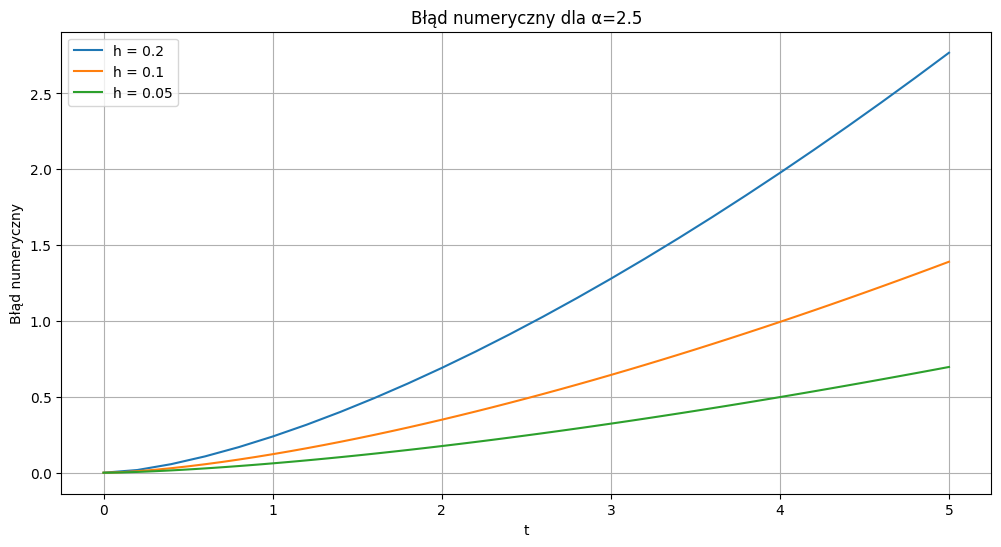

In [84]:
plot(0, 1, error_titles[0], error_ylabel, labels)

*Wykres 1. Błąd numeryczny dla $α$ = 2.5* 

Dla różnych wartości $h$ otrzymujemy ten sam kształt wykresu przypominający funkcję kwadratową. Mniejsze wartości $h$ dają bardziej "płaskie" wykresy, co pokazuje, że zmniejszenie kroku wpływa na zmniejszenie błędu.

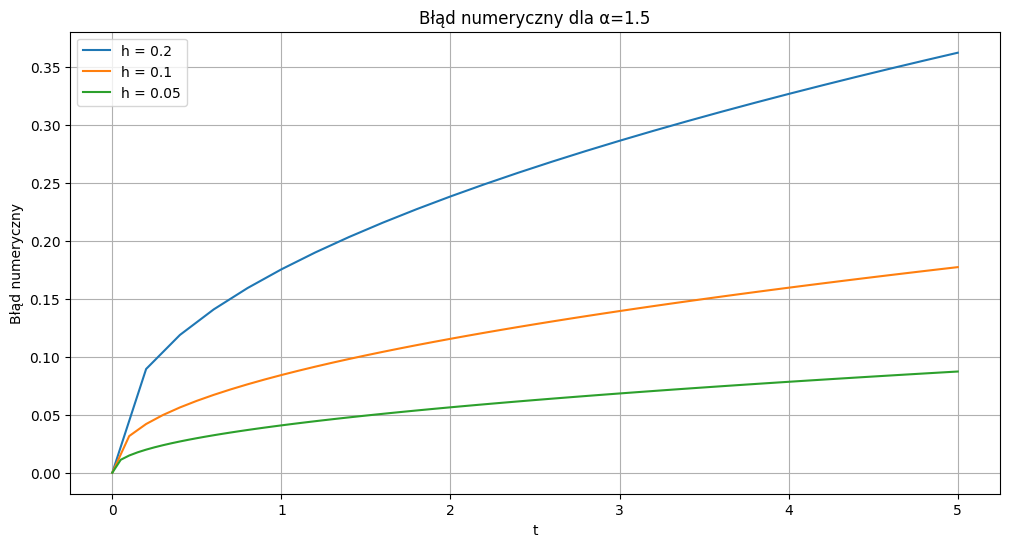

In [85]:
plot(1, 1, error_titles[1], error_ylabel, labels)

*Wykres 2. Błąd numeryczny dla $α$ = 1.5* 

Dla różnych wartości $h$ otrzymujemy ten sam kształt wykresu, który różni się od poprzednio otrzymanych kształtów. Funkcje gwałtownie rosną na początku, a potem rosną coraz wolniej. Przypominają one funkcję $\sqrt[n]{x}$. Mniejsze wartości $h$ znów dają bardziej "płaskie" wykresy, co pokazuje, że zmniejszenie kroku wpływa na zmniejszenie błędu.

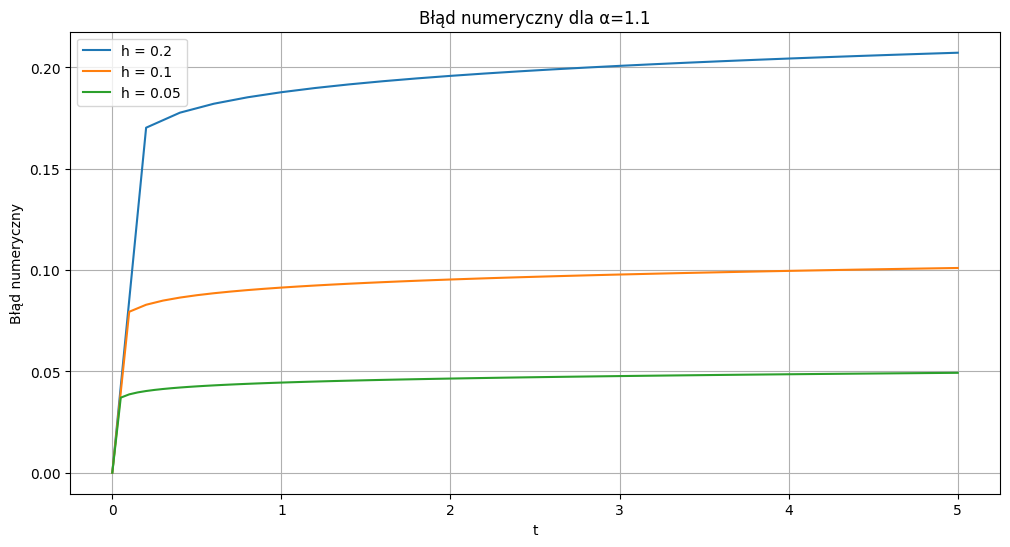

In [86]:
plot(2, 1, error_titles[2], error_ylabel, labels)

*Wykres 3. Błąd numeryczny dla $α$ = 1.1* 

Dla różnych wartości $h$ otrzymujemy ten sam kształt wykresu, który przypomina poprzednio otrzymany kształt, lecz funkcje rosną bardziej gwałtownie na początku, po czym tempo wzrostu gwałownie maleje.

Dla każdej przetestowanej wartości $α$ zmniejszenie kroku powoduje zmniejszenie błędu numerycznego. Wykresy błędu różnią się jednak kształtem. Dla małych wartości $α$ błędy są mniejsze niż dla dużych wartości, co wynika z tego, że wartości funkcji są mniejsze.

Następnie wyznaczyliśmy eksperymetalnie rząd zbieżności dla każdej wartości $α$ i $h$ ze wzoru
$$
r = \frac{\ln \frac{\varepsilon_k}{\varepsilon_{k+1}}}{\ln \frac{\varepsilon_{k-1}}{\varepsilon_k}}
$$

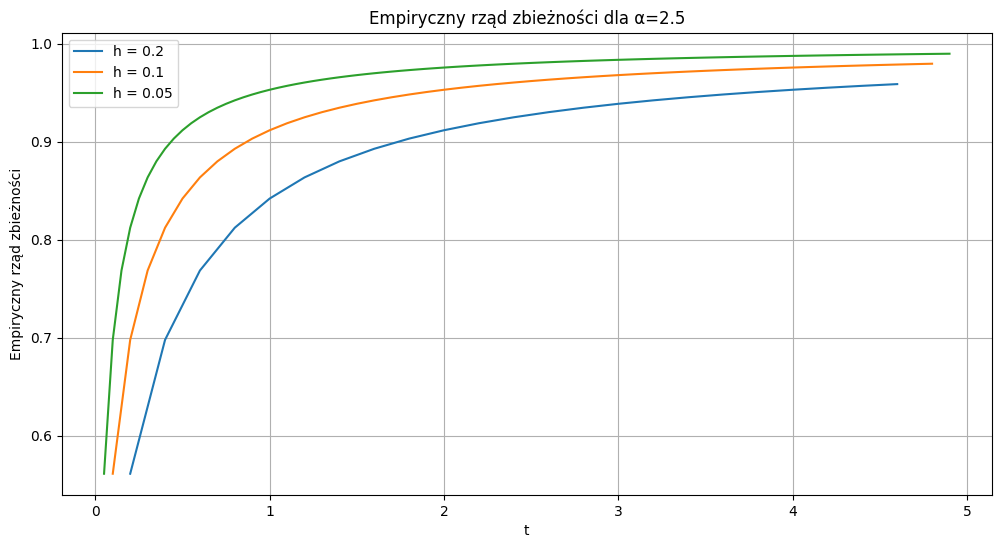

In [87]:
plot(0, 2, r_titles[0], r_ylabel, labels)

*Wykres 4. Empiryczny rząd zbieżności dla $α$ = 2.5* 

Wartość empirycznego rzędu zbieżności dąży asymptotycznie do $1$ niezależnie od $h$. Dla większych wartości $h$ zbieżność jest szybsza.

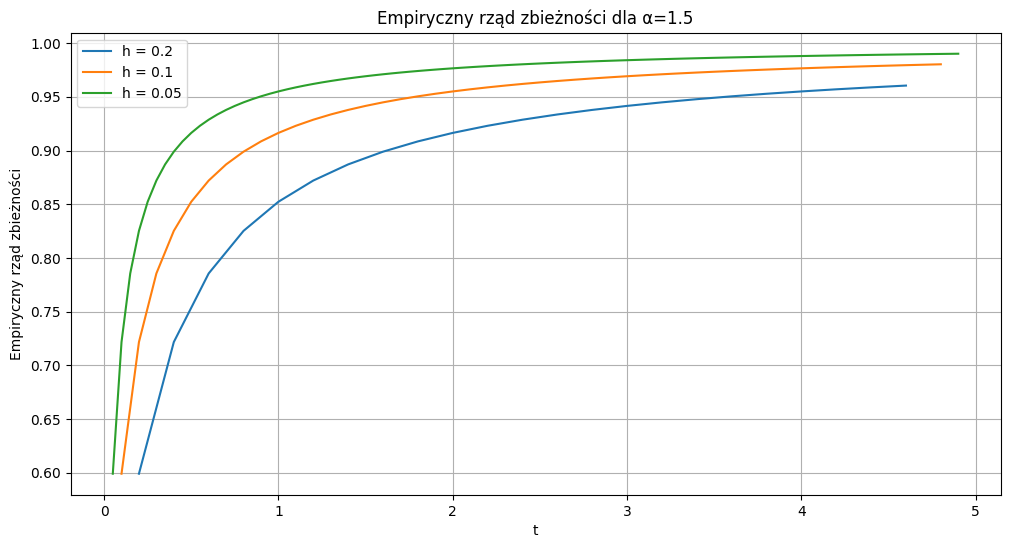

In [88]:
plot(1, 2, r_titles[1], r_ylabel, labels)

*Wykres 5. Empiryczny rząd zbieżności dla $α$ = 1.5*

Tak samo jak wcześniej, wartość graniczna empirycznego rzędu jest niezależna od $h$, a zbieżność do $1$ jest szybsza dla małych wartości $h$.

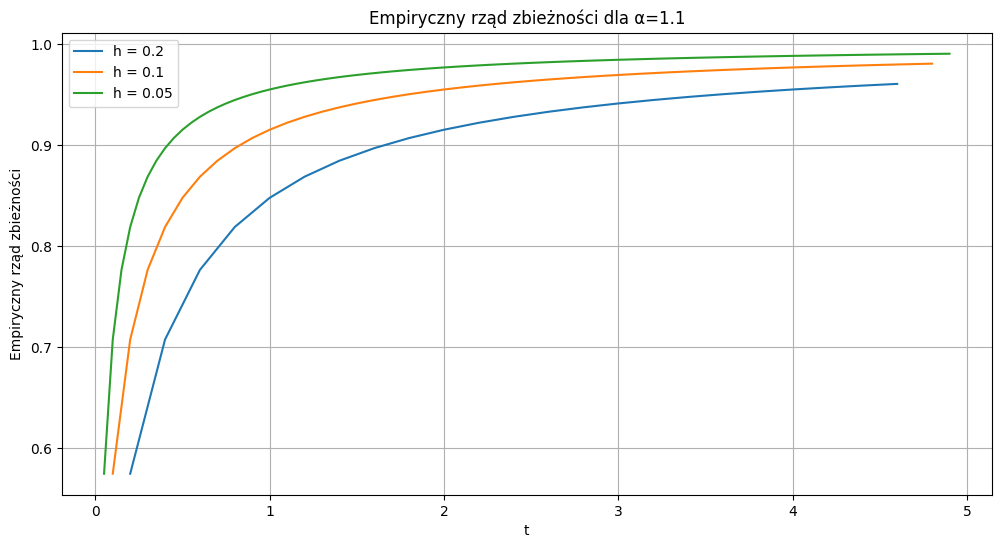

In [89]:
plot(2, 2, r_titles[2], r_ylabel, labels)

*Wykres 6. Empiryczny rząd zbieżności dla $α$ = 1.1*

Wykres wygląda tak samo jak oba poprzednie wykresy.

Jak widać wartość empirycznego rzędu zbieżności jest niezależna od badanej funkcji i przyjętego kroku. Wynosi ona $1$, co jest zgodne z oczekiwaniami.